# Linear Regression Tutorial

## 1. Introduction to Linear Regression
Linear Regression is a fundamental machine learning algorithm used to model the relationship between a dependent variable (target) and one or more independent variables (features). It assumes that the relationship between the variables can be represented as a straight line.

**Equation of Linear Regression**:

\[
y = w \cdot x + b
\]

Where:
- \(w\) is the weight (slope) that determines how much the output \(y\) changes with a change in \(x\),
- \(b\) is the bias (intercept),
- \(y\) is the predicted value for a given input \(x\).

The goal is to minimize the difference between the actual and predicted values, typically using the **Mean Squared Error (MSE)** loss function.

## 2. Key Concepts
- **Dependent Variable (y)**: The outcome or target that the model is trying to predict.
- **Independent Variable (X)**: The input features used to predict the dependent variable.
- **Coefficients (w and b)**: Parameters learned by the model during training.
- **Mean Squared Error (MSE)**: A common metric to measure the performance of a linear regression model by taking the average of squared differences between actual and predicted values.


## 3. Linear Regression: Step-by-Step Process

### Step 1: Import Necessary Libraries
We'll use Python's `scikit-learn` library, which offers an easy-to-use implementation of linear regression. Additionally, we'll use `NumPy` for numerical operations and `matplotlib` for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


### Step 2: Dataset Preparation
For this tutorial, we will create a synthetic dataset. You can replace this with real-world data later.

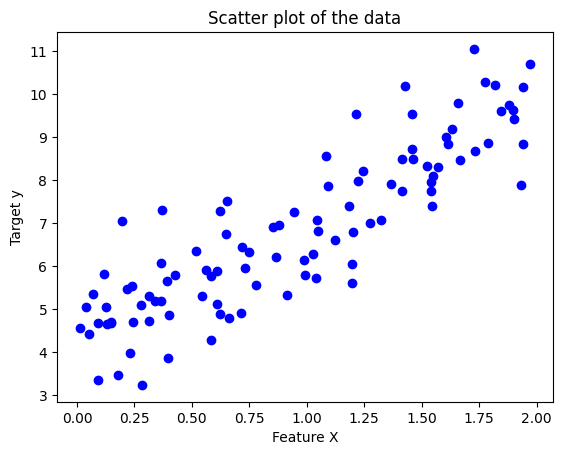

In [2]:
# Create a simple dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Features (random numbers)
y = 4 + 3 * X + np.random.randn(100, 1)  # Target values (y = 4 + 3X + noise)

# Plot the data to visualize it
plt.scatter(X, y, color="blue")
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Scatter plot of the data')
plt.show()


### Step 3: Train-Test Split
We split our data into training and test sets. The training set is used to fit the model, and the test set is used to evaluate it.

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Train the Linear Regression Model
We will now initialize the `LinearRegression` model from `scikit-learn` and fit it using the training data.

In [4]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Print the learned parameters (slope and intercept)
print(f"Intercept: {model.intercept_[0]}")
print(f"Slope: {model.coef_[0][0]}")


Intercept: 4.142913319458566
Slope: 2.7993236574802762


### Step 5: Make Predictions
Now that our model is trained, we can use it to predict the target values for the test data.

In [5]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.6536995137170021
R-squared: 0.8072059636181392


### Step 6: Visualize the Results
Let's visualize the regression line along with the actual data to see how well the model fits.

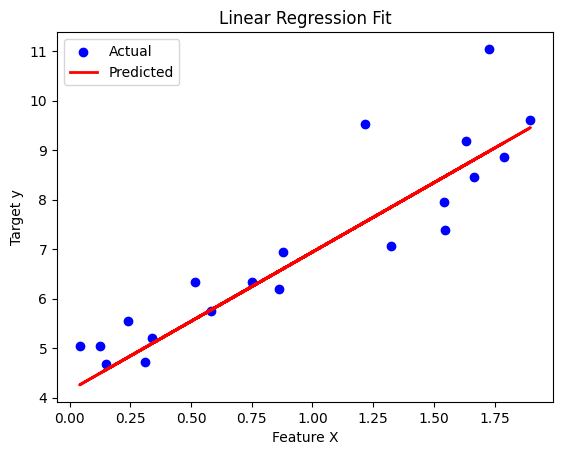

In [6]:
# Plot the regression line
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted", linewidth=2)
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


## 4. End-to-End Example: Predicting House Prices
Now, let's use a more real-world dataset to demonstrate Linear Regression. We’ll use the Boston Housing dataset, which contains information about houses in Boston, such as the number of rooms, crime rate, etc., to predict the price of a house.

### Step 1: Load the Dataset

# Multiple Linear Regression Example Using the California Housing Dataset

## 1. Problem Statement
We want to predict the median house value in California based on multiple features, such as:
- Median income
- Housing median age
- Total rooms
- Total bedrooms
- Population
- Households
- Latitude
- Longitude

## 2. Steps to Follow
1. **Load the dataset**: California Housing dataset from `sklearn`.
2. **Data preprocessing**: Standardize the data and handle any missing values.
3. **Train-test split**: Split the data into training and test sets.
4. **Model training**: Fit a multiple linear regression model.
5. **Model evaluation**: Evaluate using metrics like Mean Squared Error and R-squared.
6. **Visualization**: Plot the actual vs predicted values.

## 3. Step-by-Step Implementation

### Step 1: Import the Required Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing


### Step 2: Load the California Housing Dataset
We'll use the built-in **fetch_california_housing** function from **sklearn.datasets**.

In [8]:
# Load the dataset
data = fetch_california_housing()

# Create a DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Display the first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Step 3: Data Preprocessing
In this step, we'll standardize the features so that they all have the same scale, which is important for linear regression models.

In [9]:
# Features (X) and Target (y)
X = df.drop('Target', axis=1)  # Drop the target column from the features
y = df['Target']  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Step 4: Train the Multiple Linear Regression Model
Now that we have our data prepared, we can train the model.

In [10]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train_scaled, y_train)

# Print the learned coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 2.0719469373788777
Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


### Step 5: Make Predictions and Evaluate the Model
We will now evaluate the model using the test set and measure its performance using **Mean Squared Error (MSE)** and **R-squared**.

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451


### Step 6: Visualize the Results
To visualize the performance, we can create a scatter plot of the actual vs predicted house prices. We'll also plot the 45-degree line, which represents the ideal case where predicted values perfectly match the actual values.

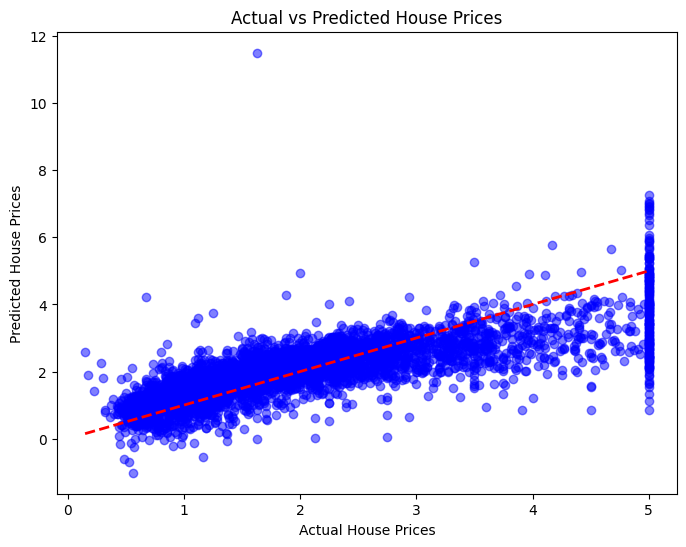

In [12]:
# Scatter plot of actual vs predicted house prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


## 4. Summary of Results
* Model Intercept: The constant value the model predicts if all features are zero.
* Model Coefficients: The weights assigned to each feature, indicating how much the target value is expected to change as the feature value changes.
* Mean Squared Error (MSE): A measure of how well the model fits the data. The lower, the better.
* R-squared: A measure of how much of the variance in the target variable is explained by the model. A value closer to 1 indicates a better fit.

## 5. Enhancements to Improve Accuracy
To improve the performance of the model:

* Feature Engineering: Create additional features or transform existing ones (e.g., polynomial features).
* Regularization: Use techniques like Ridge or Lasso regression to prevent overfitting.
* Cross-Validation: Perform k-fold cross-validation to better assess the model's generalization performance.

## 6. Summary
In this tutorial, we covered:

* The basic theory behind Linear Regression.
* How to implement a Linear Regression model using scikit-learn.
* An end-to-end example using the California Housing dataset.
By understanding this fundamental algorithm, you now have the foundation to explore more advanced regression techniques and apply linear regression to various datasets.